Визуалиазция и анализ результатов по тестам вставки, поиска и удаления с целочисленными значениями.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

test_int_results = pd.read_csv('results/test_int_results.csv')
test_double_int_results = pd.read_csv('results/test_double_int_results.csv')

Результаты и анализ хэш-таблиц с одной хэш-функцией.

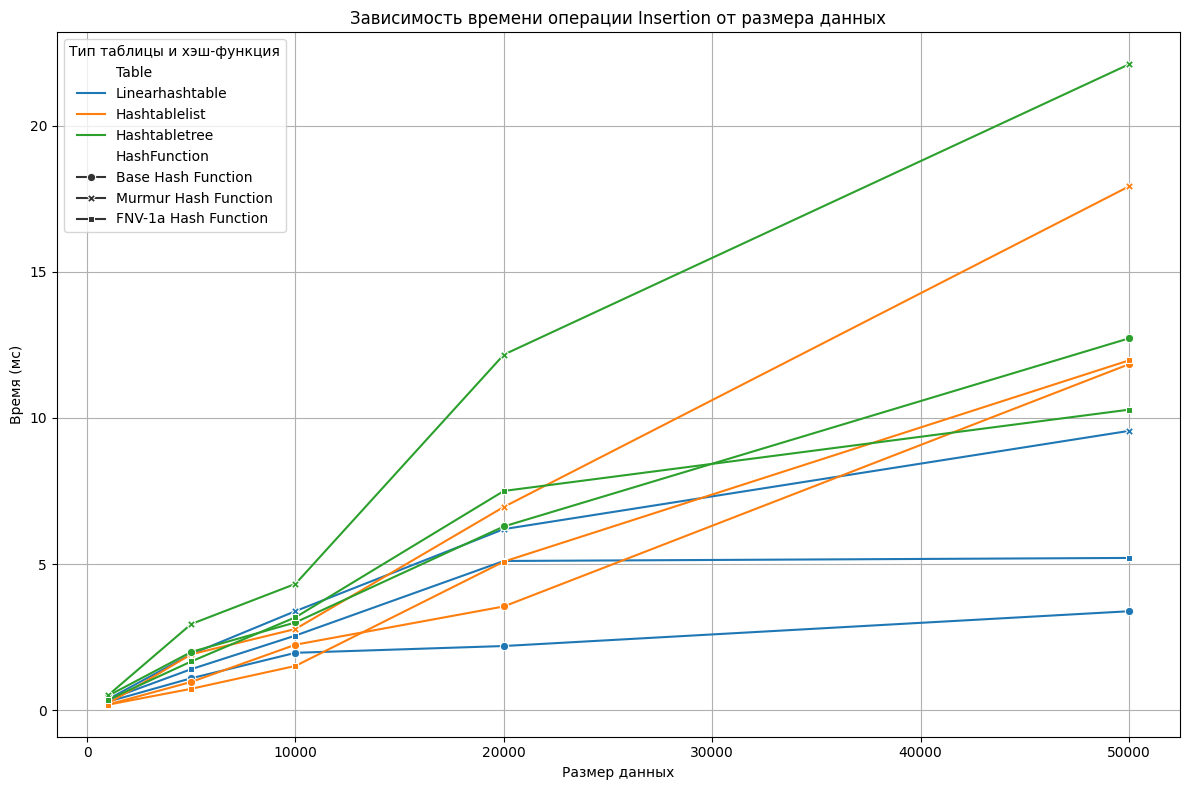

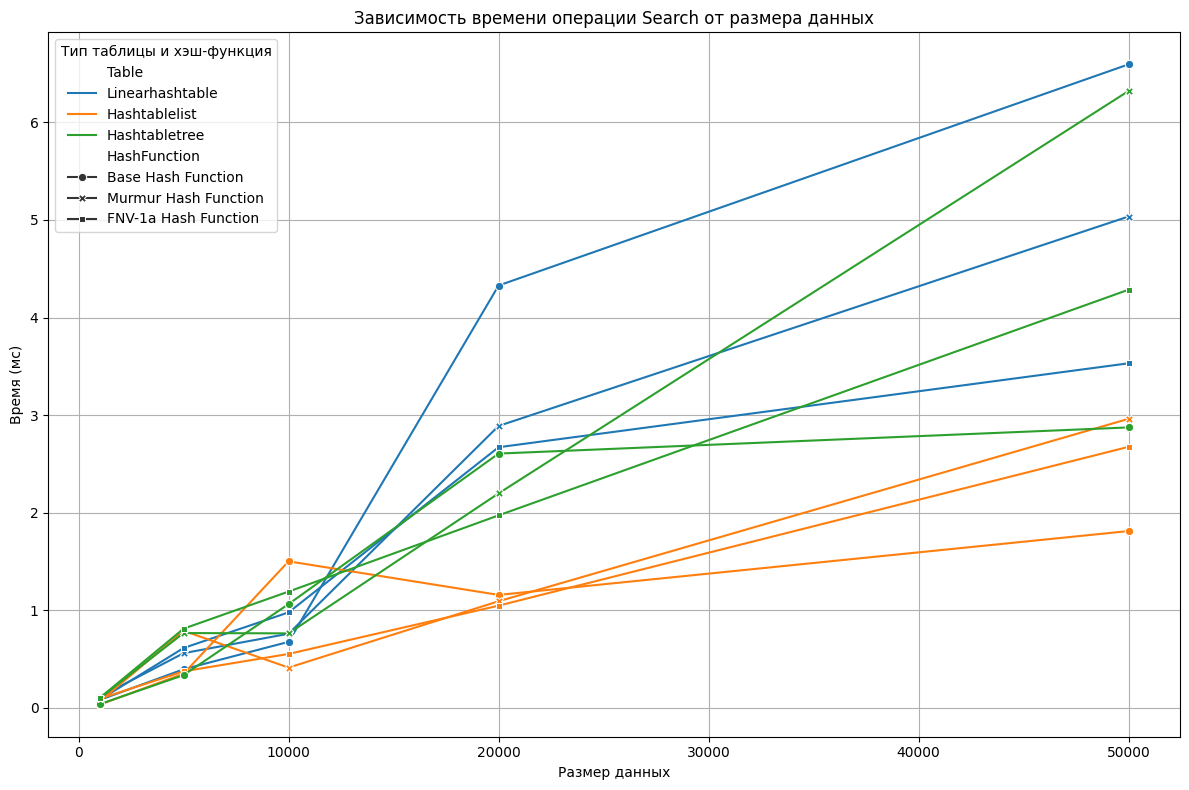

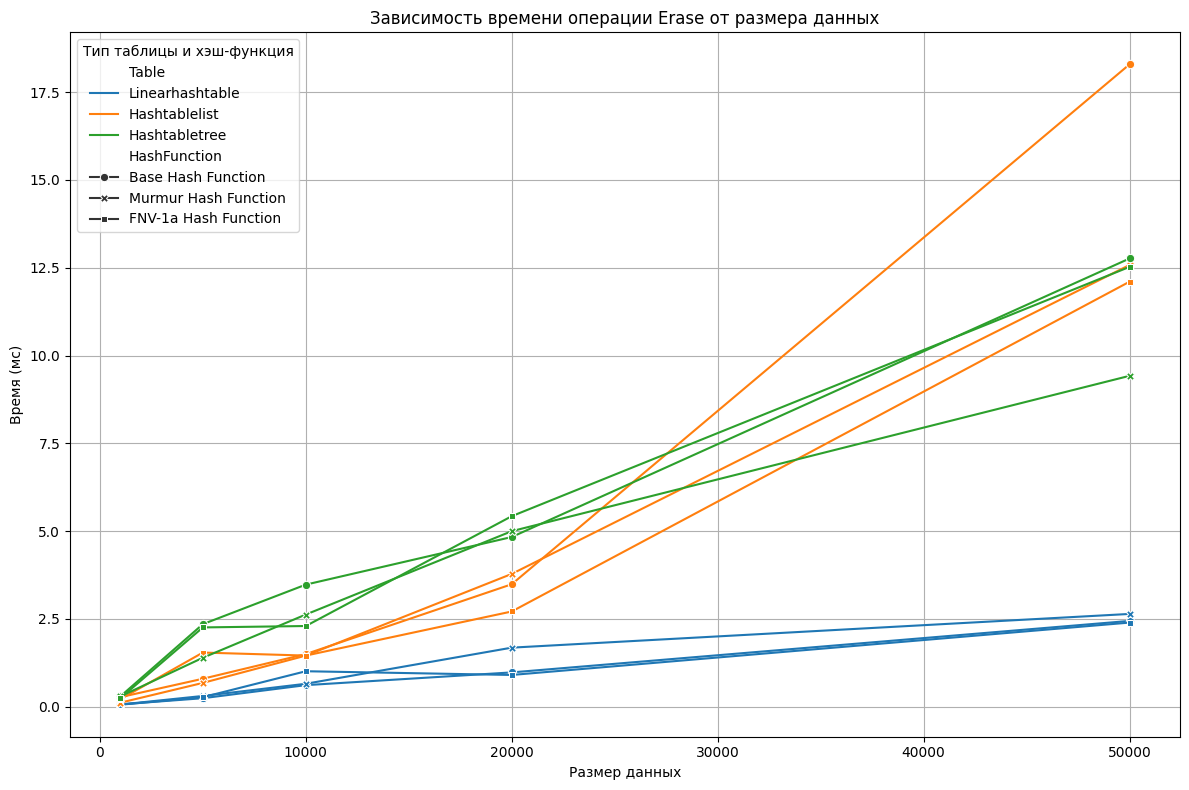

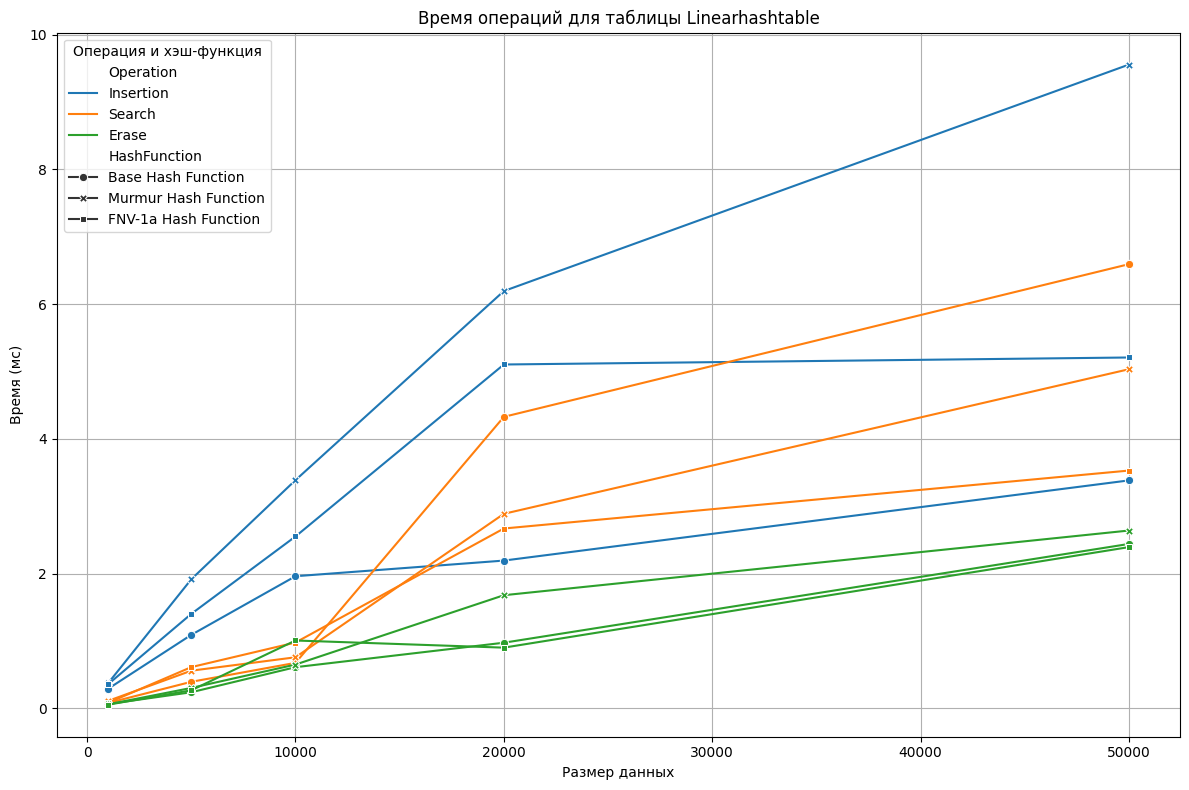

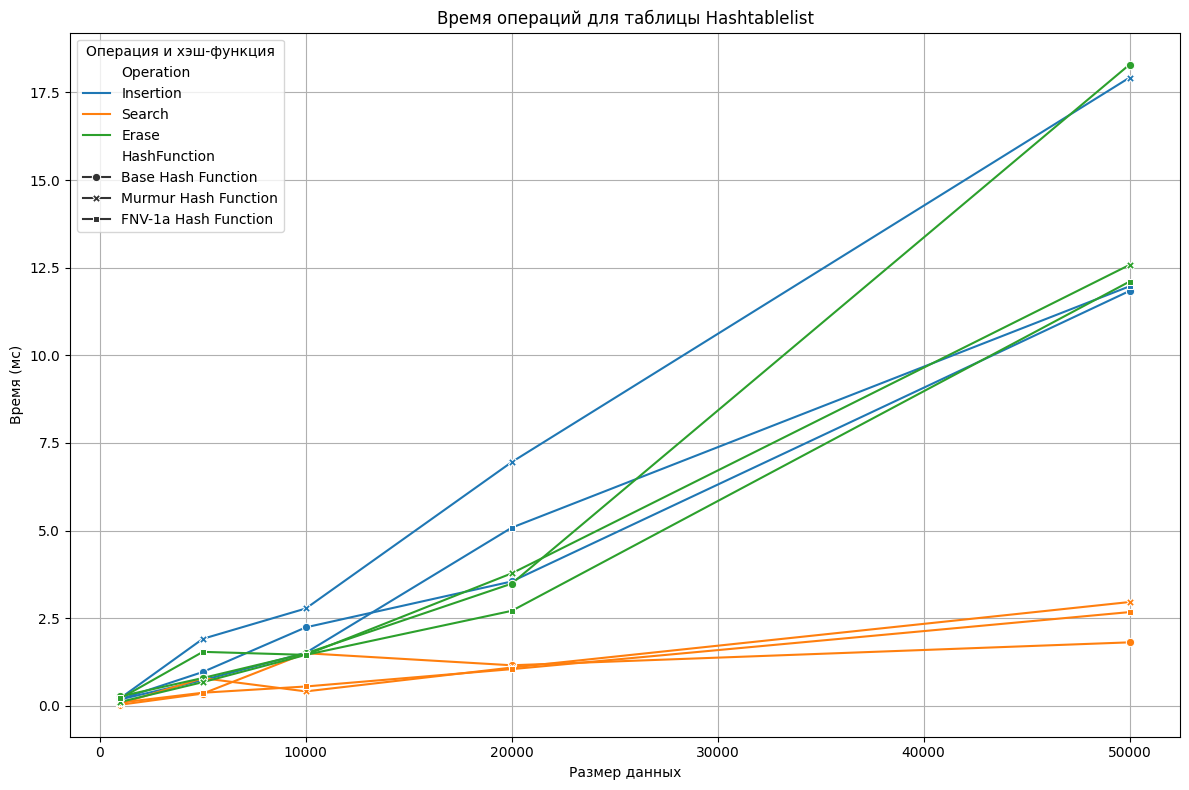

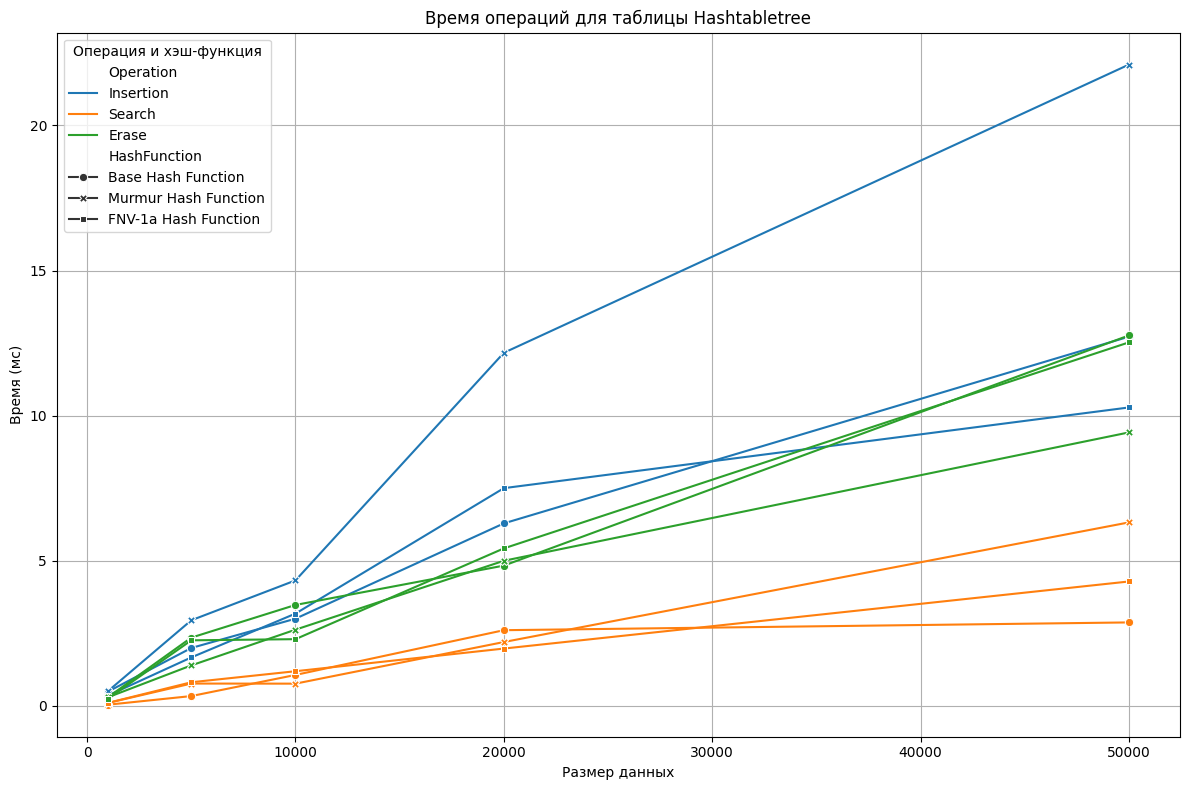

C:\Users\buddy\AppData\Local\Temp\ipykernel_3488\715899077.py:38: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Table', y='Time(ms)', hue='Operation', ci=None)


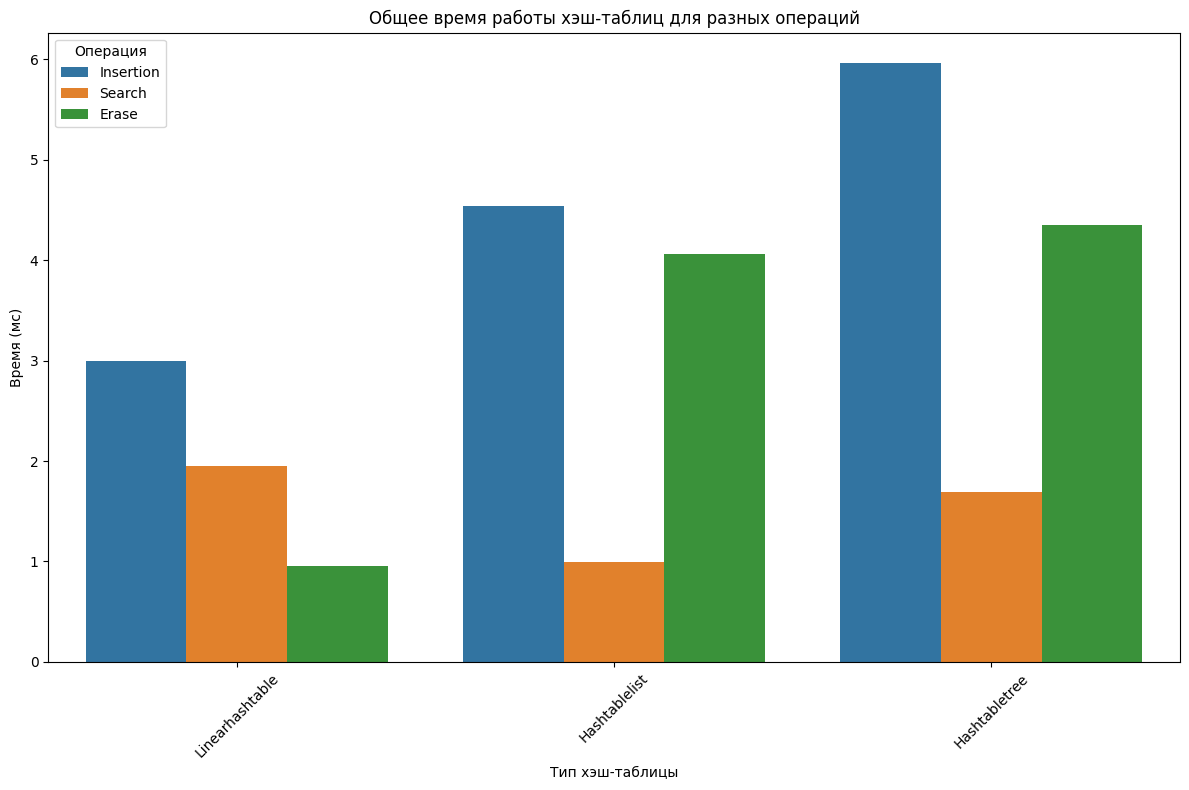

C:\Users\buddy\AppData\Local\Temp\ipykernel_3488\715899077.py:49: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='HashFunction', y='Time(ms)', hue='Operation', ci=None)


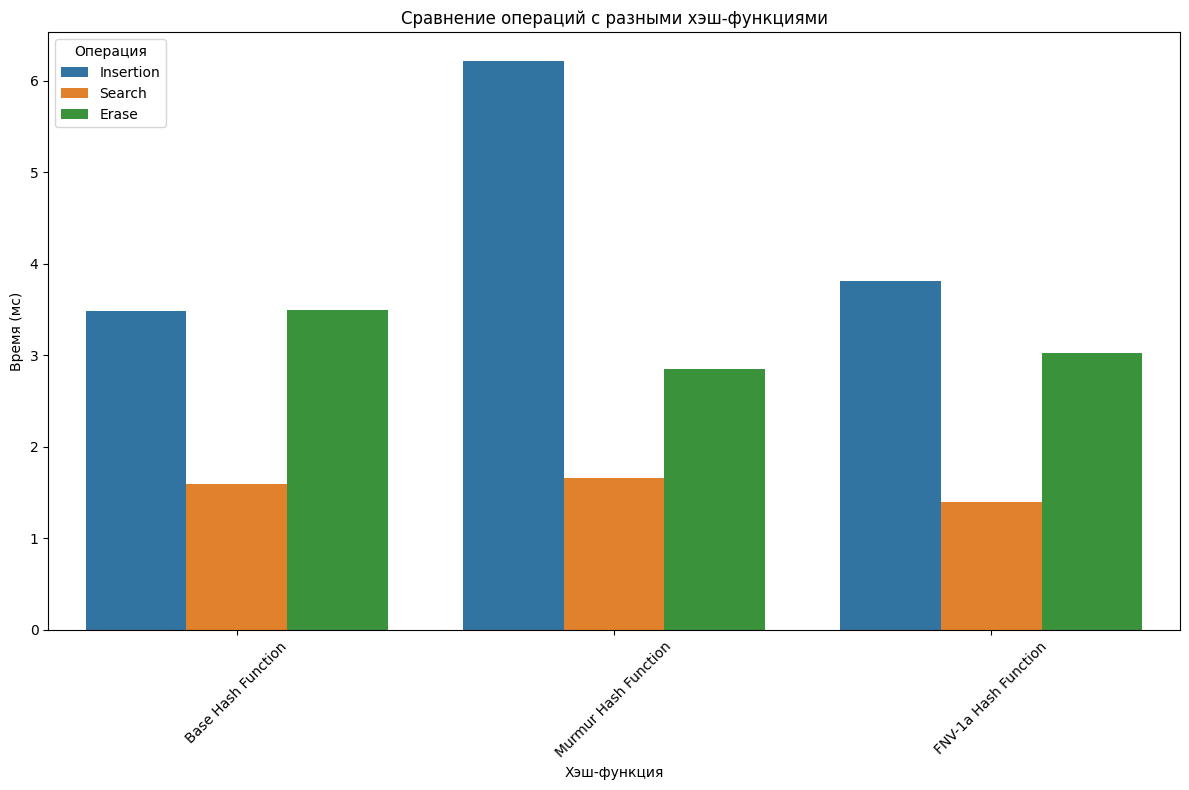

C:\Users\buddy\AppData\Local\Temp\ipykernel_3488\715899077.py:60: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(


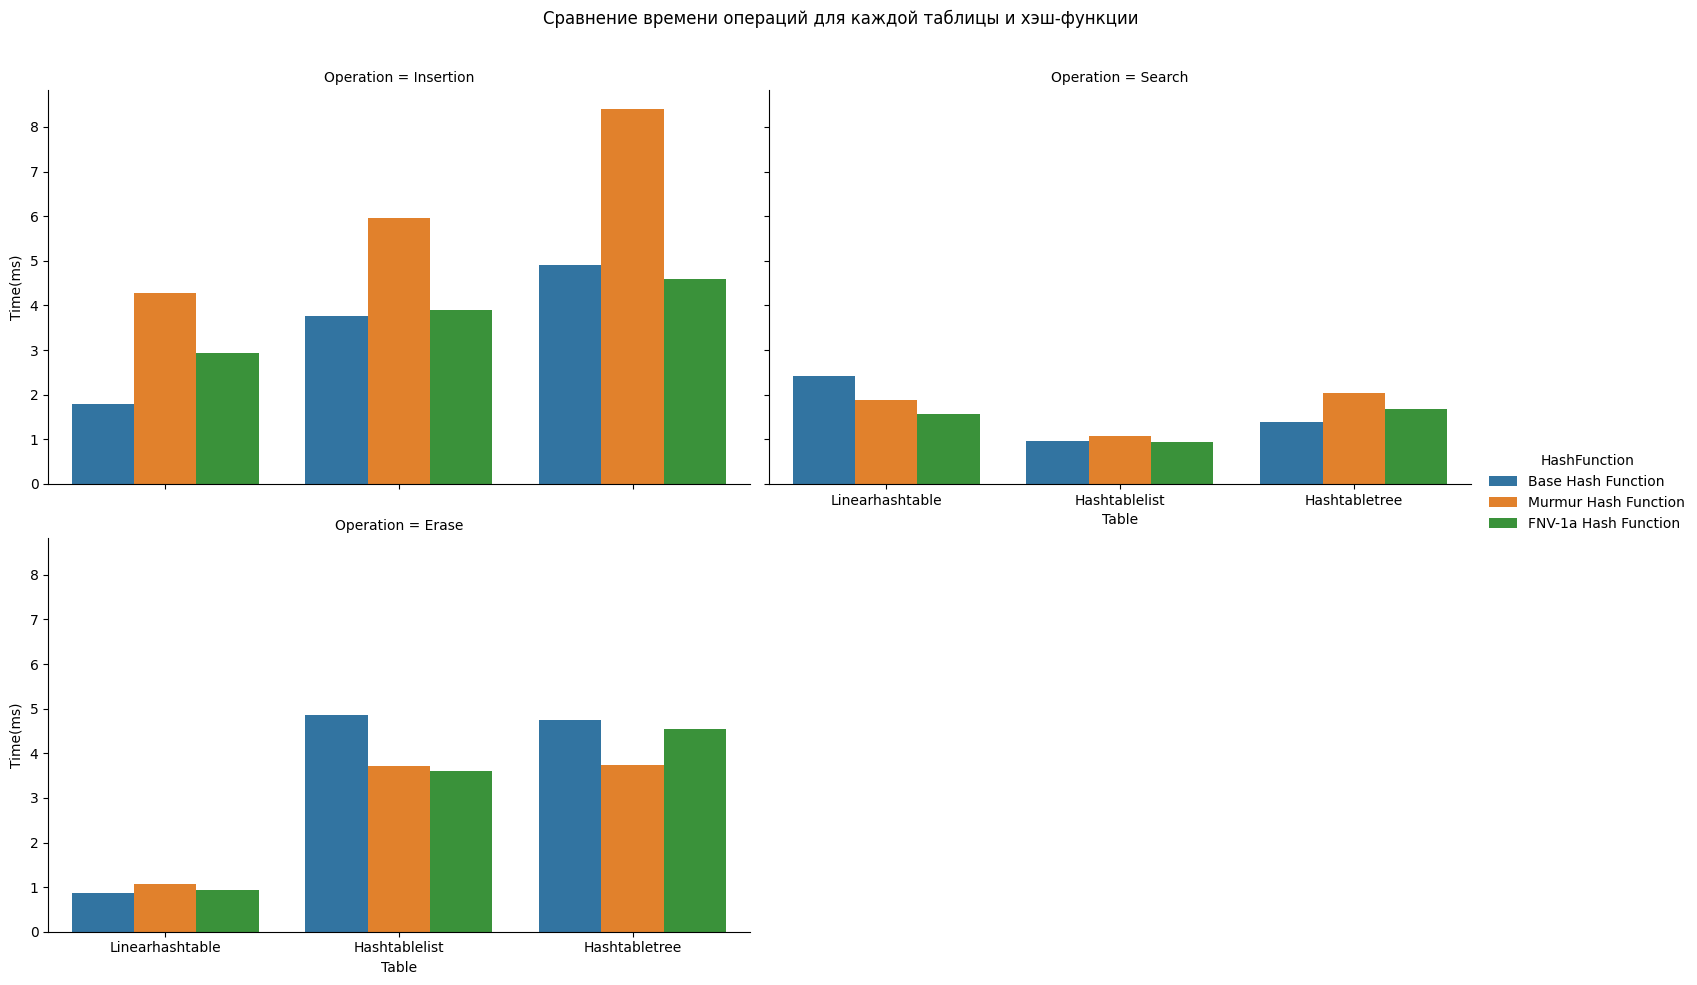

In [21]:
df = test_int_results

df['Operation'] = df['Operation'].str.capitalize()  
df['Table'] = df['Table'].str.capitalize()  

def plot_time_by_data_size_per_operation(df):
    operations = df['Operation'].unique()
    for operation in operations:
        plt.figure(figsize=(12, 8))
        sns.lineplot(
            data=df[df['Operation'] == operation],
            x='DataSize', y='Time(ms)', hue='Table', style='HashFunction', markers=True, dashes=False
        )
        plt.title(f'Зависимость времени операции {operation} от размера данных')
        plt.xlabel('Размер данных')
        plt.ylabel('Время (мс)')
        plt.legend(title='Тип таблицы и хэш-функция', loc='upper left')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

def plot_time_for_single_table(df, table_name):
    plt.figure(figsize=(12, 8))
    sns.lineplot(
        data=df[df['Table'] == table_name],
        x='DataSize', y='Time(ms)', hue='Operation', style='HashFunction', markers=True, dashes=False
    )
    plt.title(f'Время операций для таблицы {table_name}')
    plt.xlabel('Размер данных')
    plt.ylabel('Время (мс)')
    plt.legend(title='Операция и хэш-функция', loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_overall_comparison(df):
    plt.figure(figsize=(12, 8))
    sns.barplot(data=df, x='Table', y='Time(ms)', hue='Operation', ci=None)
    plt.title('Общее время работы хэш-таблиц для разных операций')
    plt.xlabel('Тип хэш-таблицы')
    plt.ylabel('Время (мс)')
    plt.legend(title='Операция', loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_time_by_hash_function(df):
    plt.figure(figsize=(12, 8))
    sns.barplot(data=df, x='HashFunction', y='Time(ms)', hue='Operation', ci=None)
    plt.title('Сравнение операций с разными хэш-функциями')
    plt.xlabel('Хэш-функция')
    plt.ylabel('Время (мс)')
    plt.legend(title='Операция', loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


def plot_combined_comparison(df):
    g = sns.catplot(
        data=df, x='Table', y='Time(ms)', hue='HashFunction',
        col='Operation', kind='bar', ci=None, col_wrap=2, height=5, aspect=1.5
    )
    g.fig.subplots_adjust(top=0.9)  
    g.fig.suptitle('Сравнение времени операций для каждой таблицы и хэш-функции')
    plt.show()


plot_time_by_data_size_per_operation(df)  
plot_time_for_single_table(df, 'Linearhashtable')
plot_time_for_single_table(df, 'Hashtablelist') 
plot_time_for_single_table(df, 'Hashtabletree')   
plot_overall_comparison(df) 
plot_time_by_hash_function(df)  
plot_combined_comparison(df)  

Выводы по результатам анализа хэш-таблиц с одной хэш-функцией.

In [22]:
df = test_int_results

df['Table'] = df['Table'].str.capitalize()
df['HashFunction'] = df['HashFunction'].str.capitalize()
df['Operation'] = df['Operation'].str.capitalize()

average_time_table = df.groupby('Table')['Time(ms)'].mean().sort_values()
print("Среднее время выполнения для каждой таблицы:")
print(average_time_table)
print()

best_table = average_time_table.idxmin()
print(f"Самая быстрая таблица в среднем: {best_table} со средним временем {average_time_table.min():.3f} мс.")
print()

operations = ['Insertion', 'Erase', 'Search']
for operation in operations:
    fastest_operation = df[df['Operation'] == operation].sort_values('Time(ms)').iloc[0]
    print(f"Самая быстрая комбинация для операции {operation}:")
    print(f"  Таблица: {fastest_operation['Table']}, "
          f"Хэш-функция: {fastest_operation['HashFunction']}, "
          f"Размер данных: {fastest_operation['DataSize']}, "
          f"Время: {fastest_operation['Time(ms)']:.3f} мс.")
    print()

for operation in operations:
    print(f"Топ комбинаций по каждому размеру данных для операции {operation}:")
    grouped_by_size = df[df['Operation'] == operation].groupby('DataSize')
    for size, group in grouped_by_size:
        best_row = group.sort_values('Time(ms)').iloc[0]
        print(f"  Размер данных {size}: Таблица: {best_row['Table']}, "
              f"Хэш-функция: {best_row['HashFunction']}, "
              f"Время: {best_row['Time(ms)']:.3f} мс.")
    print()


Среднее время выполнения для каждой таблицы:
Table
Linearhashtable    1.969067
Hashtablelist      3.199044
Hashtabletree      4.003178
Name: Time(ms), dtype: float64

Самая быстрая таблица в среднем: Linearhashtable со средним временем 1.969 мс.

Самая быстрая комбинация для операции Insertion:
  Таблица: Hashtablelist, Хэш-функция: Fnv-1a hash function, Размер данных: 1000, Время: 0.187 мс.

Самая быстрая комбинация для операции Erase:
  Таблица: Linearhashtable, Хэш-функция: Fnv-1a hash function, Размер данных: 1000, Время: 0.056 мс.

Самая быстрая комбинация для операции Search:
  Таблица: Hashtablelist, Хэш-функция: Base hash function, Размер данных: 1000, Время: 0.033 мс.

Топ комбинаций по каждому размеру данных для операции Insertion:
  Размер данных 1000: Таблица: Hashtablelist, Хэш-функция: Fnv-1a hash function, Время: 0.187 мс.
  Размер данных 5000: Таблица: Hashtablelist, Хэш-функция: Fnv-1a hash function, Время: 0.732 мс.
  Размер данных 10000: Таблица: Hashtablelist, Хэш-ф

Результаты и анализ хэш-таблиц с двумя хэш-функциями.

C:\Users\buddy\AppData\Local\Temp\ipykernel_3488\22112607.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Table', y='Time(ms)', hue='Operation', ci=None)


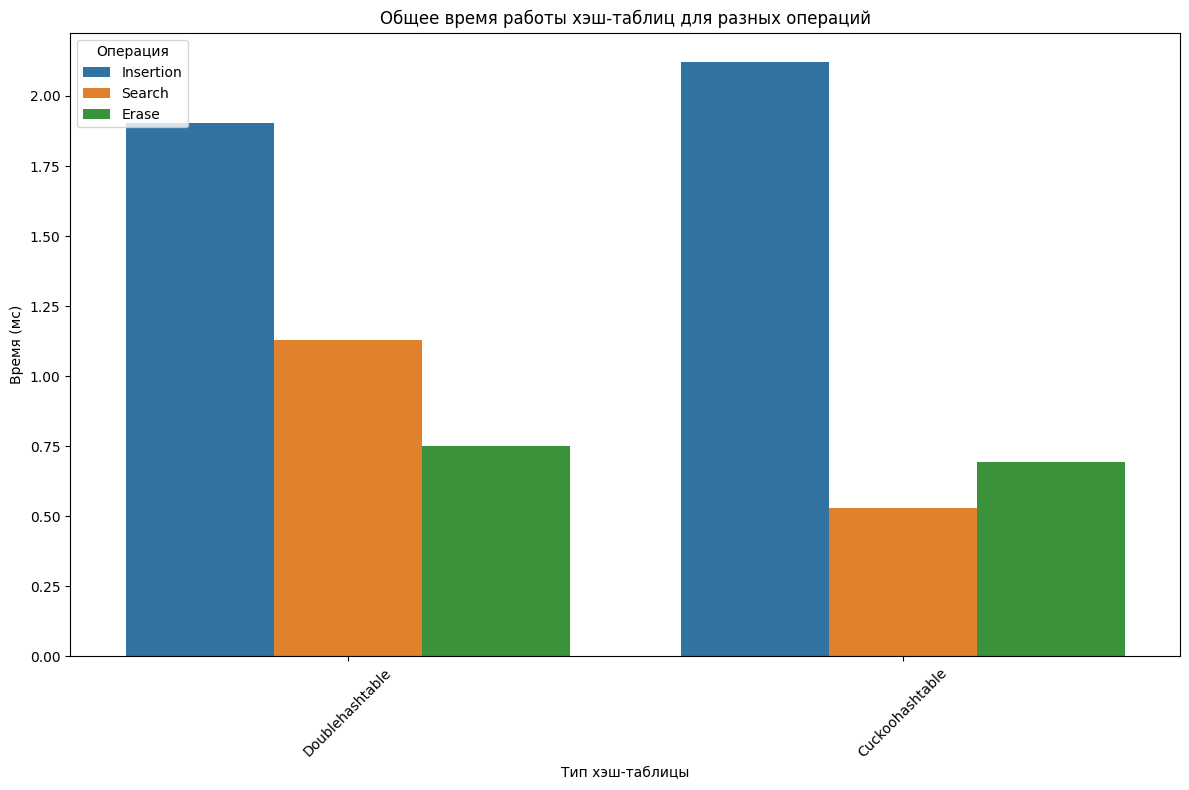

C:\Users\buddy\AppData\Local\Temp\ipykernel_3488\22112607.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='HashFunctions', y='Time(ms)', hue='Operation', ci=None)


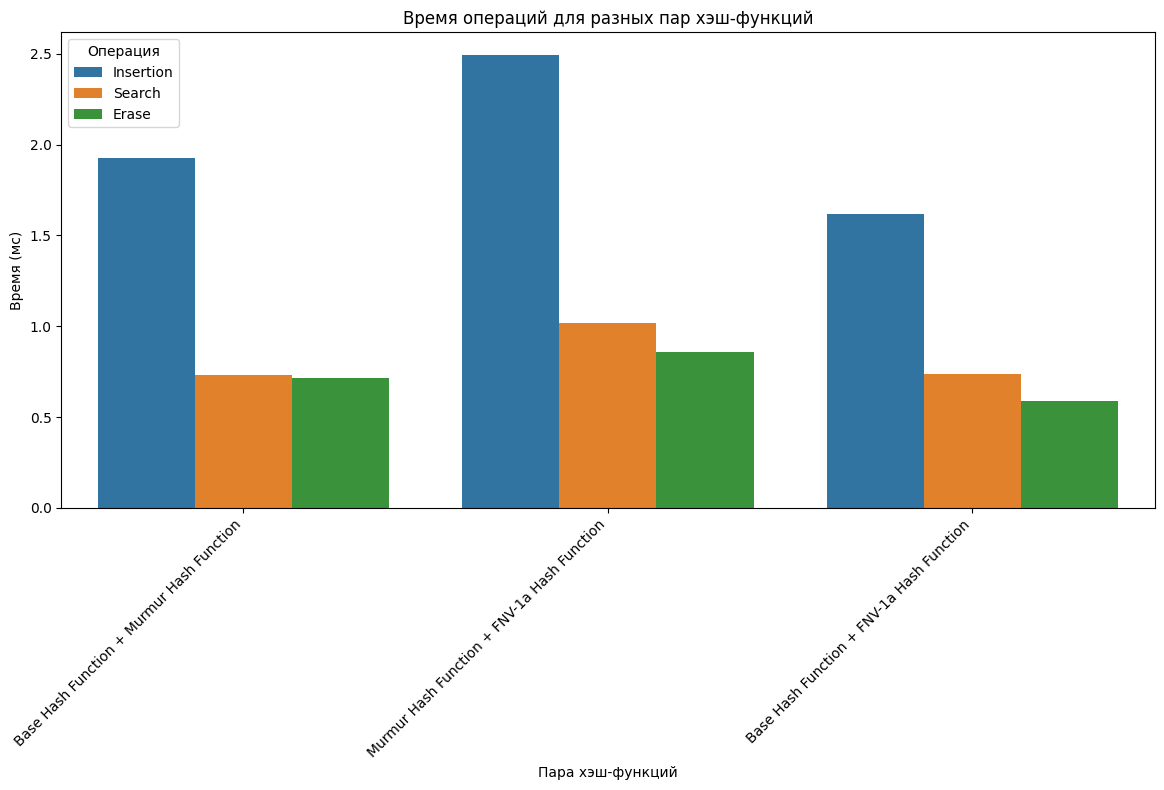

C:\Users\buddy\AppData\Local\Temp\ipykernel_3488\22112607.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Table', y='Time(ms)', hue='HashFunctions', ci=None)


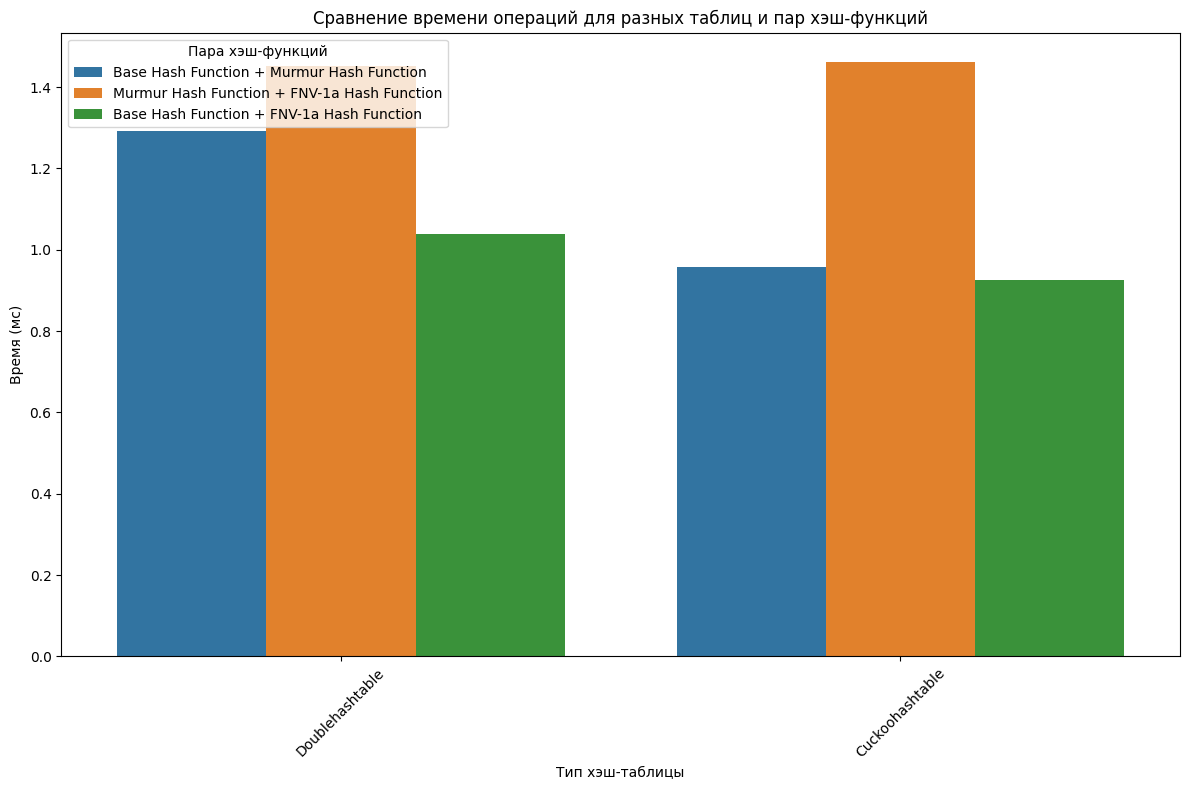

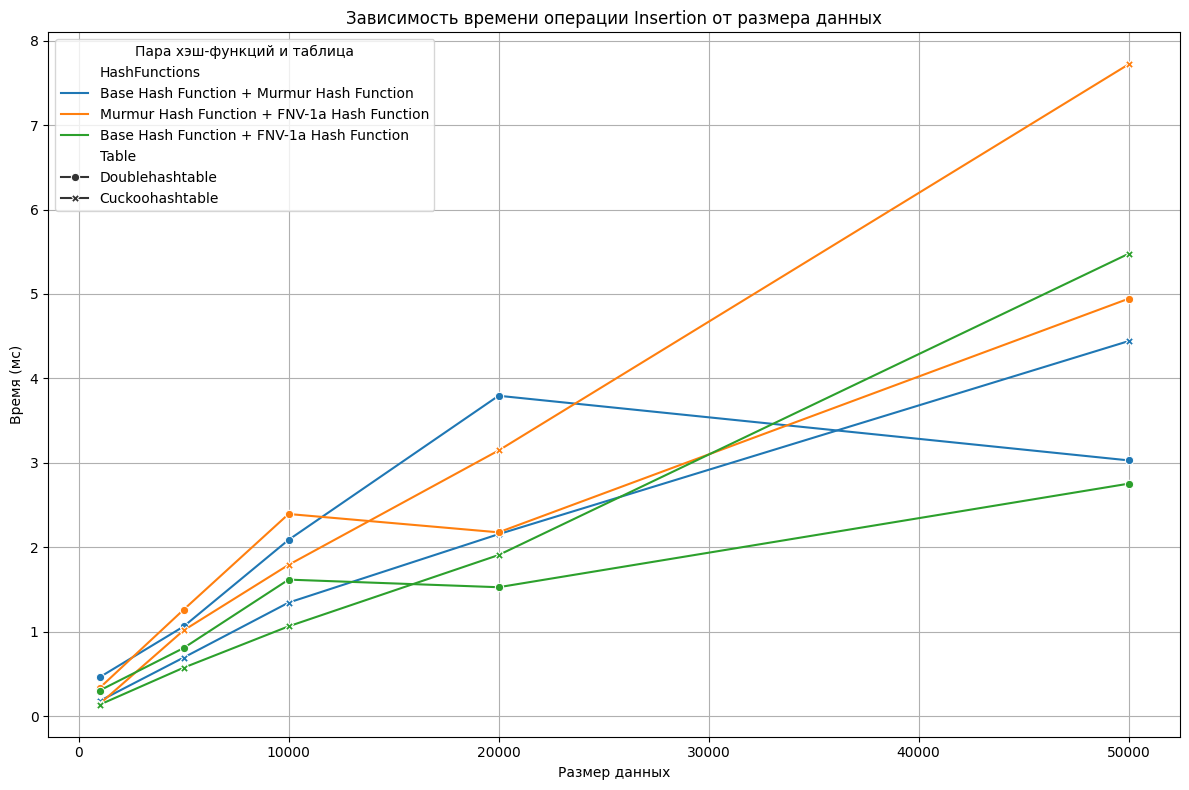

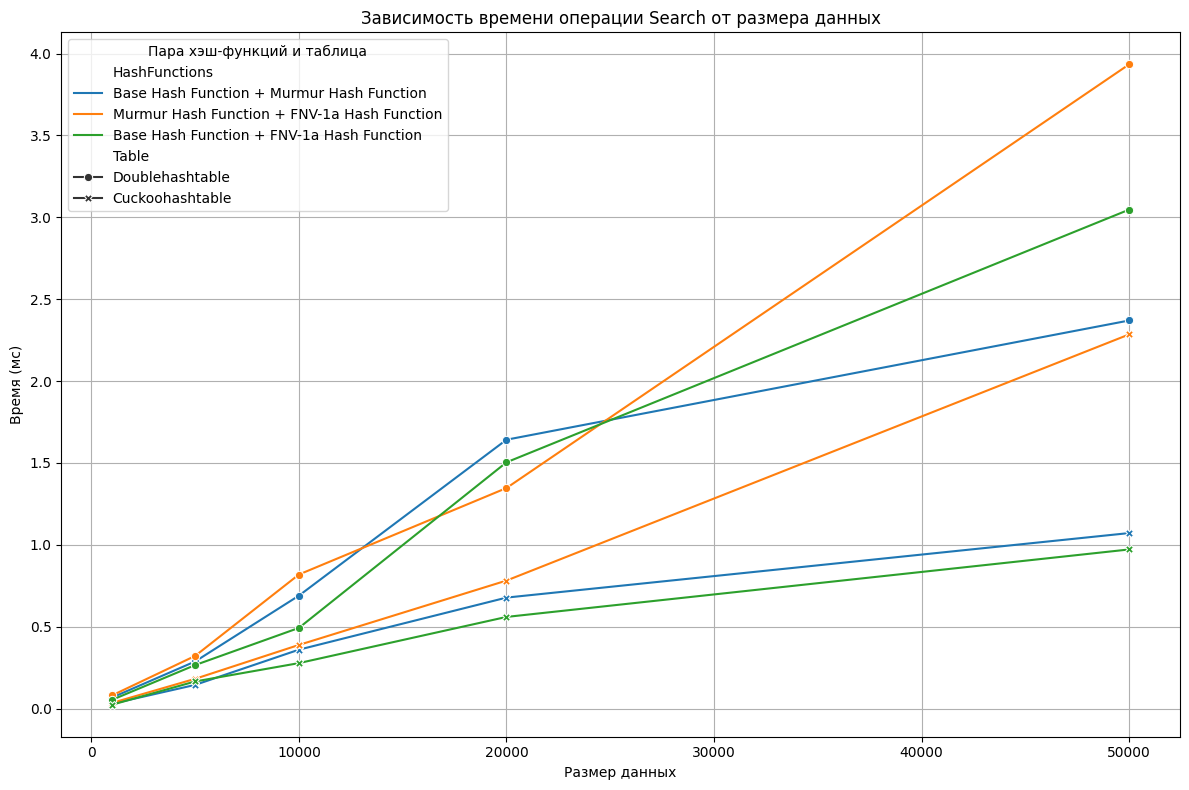

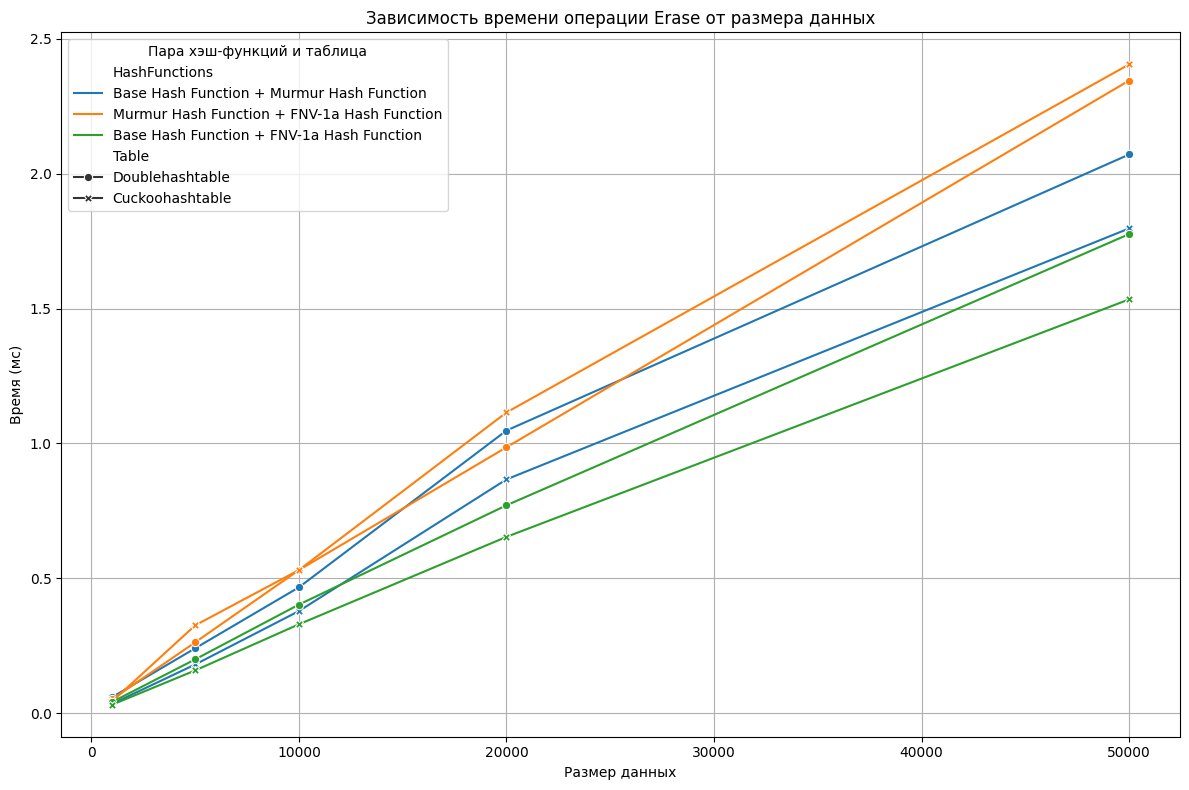

C:\Users\buddy\AppData\Local\Temp\ipykernel_3488\22112607.py:72: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(


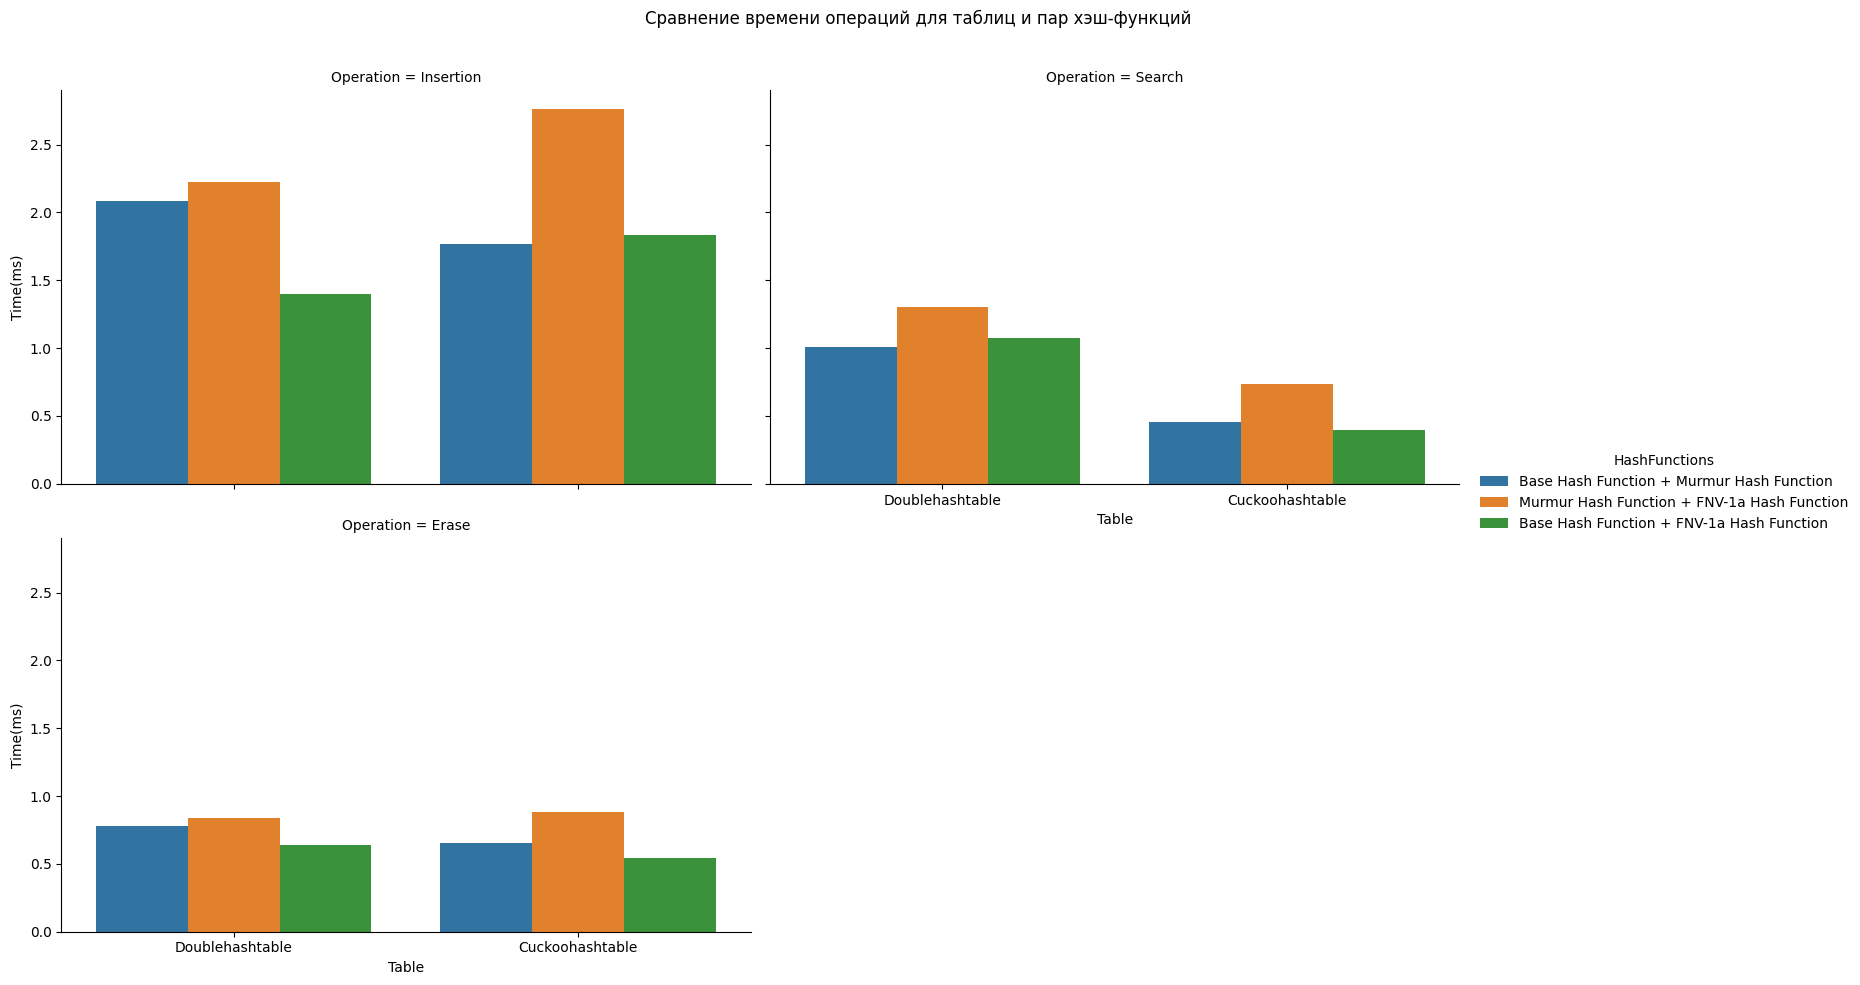

In [23]:
df = test_double_int_results

df['Operation'] = df['Operation'].str.capitalize()  
df['Table'] = df['Table'].str.capitalize() 

df['HashFunctions'] = df['HashFunction1'] + " + " + df['HashFunction2']

def plot_total_time(df):
    plt.figure(figsize=(12, 8))
    sns.barplot(data=df, x='Table', y='Time(ms)', hue='Operation', ci=None)
    plt.title('Общее время работы хэш-таблиц для разных операций')
    plt.xlabel('Тип хэш-таблицы')
    plt.ylabel('Время (мс)')
    plt.legend(title='Операция', loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_time_by_hash_functions(df):
    plt.figure(figsize=(12, 8))
    sns.barplot(data=df, x='HashFunctions', y='Time(ms)', hue='Operation', ci=None)
    plt.title('Время операций для разных пар хэш-функций')
    plt.xlabel('Пара хэш-функций')
    plt.ylabel('Время (мс)')
    plt.legend(title='Операция', loc='upper left')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def plot_time_by_table(df):
    plt.figure(figsize=(12, 8))
    sns.barplot(data=df, x='Table', y='Time(ms)', hue='HashFunctions', ci=None)
    plt.title('Сравнение времени операций для разных таблиц и пар хэш-функций')
    plt.xlabel('Тип хэш-таблицы')
    plt.ylabel('Время (мс)')
    plt.legend(title='Пара хэш-функций', loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_time_by_data_size(df):
    operations = df['Operation'].unique()
    for operation in operations:
        plt.figure(figsize=(12, 8))
        sns.lineplot(
            data=df[df['Operation'] == operation],
            x='DataSize', y='Time(ms)', hue='HashFunctions', style='Table', markers=True, dashes=False
        )
        plt.title(f'Зависимость времени операции {operation} от размера данных')
        plt.xlabel('Размер данных')
        plt.ylabel('Время (мс)')
        plt.legend(title='Пара хэш-функций и таблица', loc='upper left')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

def plot_comparison_by_operation_and_functions(df, operation):
    plt.figure(figsize=(12, 8))
    sns.barplot(
        data=df[df['Operation'] == operation],
        x='HashFunctions', y='Time(ms)', hue='Table', ci=None
    )
    plt.title(f'Сравнение таблиц для операции {operation}')
    plt.xlabel('Пара хэш-функций')
    plt.ylabel('Время (мс)')
    plt.legend(title='Тип таблицы', loc='upper left')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def plot_combined_operations(df):
    g = sns.catplot(
        data=df, x='Table', y='Time(ms)', hue='HashFunctions',
        col='Operation', kind='bar', ci=None, col_wrap=2, height=5, aspect=1.5
    )
    g.fig.subplots_adjust(top=0.9)  
    g.fig.suptitle('Сравнение времени операций для таблиц и пар хэш-функций')
    plt.show()

plot_total_time(df)  
plot_time_by_hash_functions(df)  
plot_time_by_table(df)  
plot_time_by_data_size(df) 
plot_combined_operations(df)  

Выводы по результатам хэш-таблиц с двумя хэш-функциями.

In [24]:

df = test_double_int_results

df['Table'] = df['Table'].str.capitalize()
df['HashFunction1'] = df['HashFunction1'].str.capitalize()
df['HashFunction2'] = df['HashFunction2'].str.capitalize()
df['Operation'] = df['Operation'].str.capitalize()

average_time_table = df.groupby('Table')['Time(ms)'].mean().sort_values()
print("Среднее время выполнения для каждой таблицы:")
print(average_time_table)
print()

best_table = average_time_table.idxmin()
print(f"Самая быстрая таблица в среднем: {best_table} со средним временем {average_time_table.min():.3f} мс.")
print()

operations = ['Insertion', 'Erase', 'Search']
for operation in operations:
    fastest_operation = df[df['Operation'] == operation].sort_values('Time(ms)').iloc[0]
    print(f"Самая быстрая комбинация для операции {operation}:")
    print(f"  Таблица: {fastest_operation['Table']}, "
          f"Хэш-функции: ({fastest_operation['HashFunction1']}, {fastest_operation['HashFunction2']}), "
          f"Время: {fastest_operation['Time(ms)']:.3f} мс.")
    print()

for operation in operations:
    print(f"Топ комбинаций по каждому размеру данных для операции {operation}:")
    grouped_by_size = df[df['Operation'] == operation].groupby('DataSize')
    for size, group in grouped_by_size:
        best_row = group.sort_values('Time(ms)').iloc[0]
        print(f"  Размер данных {size}: Таблица: {best_row['Table']}, "
              f"Хэш-функции: ({best_row['HashFunction1']}, {best_row['HashFunction2']}), "
              f"Время: {best_row['Time(ms)']:.3f} мс.")
    print()


Среднее время выполнения для каждой таблицы:
Table
Cuckoohashtable    1.114467
Doublehashtable    1.261044
Name: Time(ms), dtype: float64

Самая быстрая таблица в среднем: Cuckoohashtable со средним временем 1.114 мс.

Самая быстрая комбинация для операции Insertion:
  Таблица: Cuckoohashtable, Хэш-функции: (Base hash function, Fnv-1a hash function), Время: 0.137 мс.

Самая быстрая комбинация для операции Erase:
  Таблица: Cuckoohashtable, Хэш-функции: (Base hash function, Fnv-1a hash function), Время: 0.032 мс.

Самая быстрая комбинация для операции Search:
  Таблица: Cuckoohashtable, Хэш-функции: (Base hash function, Fnv-1a hash function), Время: 0.024 мс.

Топ комбинаций по каждому размеру данных для операции Insertion:
  Размер данных 1000: Таблица: Cuckoohashtable, Хэш-функции: (Base hash function, Fnv-1a hash function), Время: 0.137 мс.
  Размер данных 5000: Таблица: Cuckoohashtable, Хэш-функции: (Base hash function, Fnv-1a hash function), Время: 0.575 мс.
  Размер данных 10000: 